# Genetic Algorithm 
Reference : https://towardsdatascience.com/evolution-of-a-salesman-a-complete-genetic-algorithm-tutorial-for-python-6fe5d2b3ca35

In [1]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, random, operator, time

In [2]:
#City class 구성
class City :
    def __init__(self,x,y):
        self.x = x
        self.y = y
    
    def distance(self,city):
        Dis = np.sqrt((self.x-city.x)**2+(self.y-city.y)**2)
        return Dis
    
    def __repr__(self):
        return '('+str(self.x)+','+str(self.y)+')'
    

In [3]:
city1 = City(3,5)

In [4]:
city1

(3,5)

In [5]:
city2 = City(5,7)

In [6]:
city1.distance(city2)

2.8284271247461903

In [7]:
#Fitness
class Fitness :
    def __init__(self,route):
        self.route = route
        self.distance =0
        self.fitness = 0
        
        
        
    def routeDistance(self):
        pathdistance = 0
        if self.distance == 0:
            for i in range(0,len(self.route)):
                if i+1 < len(self.route):
                    fromCity = self.route[i]
                    toCity = self.route[i+1]
                    pathdistance += fromCity.distance(toCity)
                else :
                    fromCity = self.route[len(self.route)-1]
                    toCity = self.route[0]
                    pathdistance += fromCity.distance(toCity)
        return pathdistance
    
    def routeFitness(self):
        routefitness = 0
        routedistance = self.routeDistance()
        if self.fitness==0:
            routefitness = 1/float(routedistance)
            
        return routefitness
              

In [8]:
route1 = []
route1.append(city1)
route1.append(city2)

In [9]:
route1

[(3,5), (5,7)]

In [10]:
fitness1 = Fitness(route1).routeFitness()

In [11]:
fitness1

0.17677669529663687

In [12]:
#createRoute : CityList에서 구성된 랜덤샘플로 route구성
def createRoute(cityList):
    route = random.sample(cityList,len(cityList))
    return route

In [13]:
route1

[(3,5), (5,7)]

In [14]:
route1.append(City(8,8))

In [15]:
route1.append(City(1,8))

In [16]:
route1

[(3,5), (5,7), (8,8), (1,8)]

In [17]:
citylist1=route1

In [18]:
citylist1

[(3,5), (5,7), (8,8), (1,8)]

In [19]:
createRoute(citylist1)

[(3,5), (1,8), (8,8), (5,7)]

In [20]:
#cityList,popNum입력받아 popNum개의 population 형성
def initialPopulation(cityList,popNum):
    population = []
    for i in range(popNum):
        population.append(createRoute(cityList))
    return population

In [21]:
a = initialPopulation(citylist1,6)

In [22]:
a

[[(1,8), (3,5), (8,8), (5,7)],
 [(8,8), (1,8), (5,7), (3,5)],
 [(8,8), (5,7), (3,5), (1,8)],
 [(8,8), (1,8), (3,5), (5,7)],
 [(8,8), (3,5), (1,8), (5,7)],
 [(3,5), (1,8), (8,8), (5,7)]]

In [23]:
a

[[(1,8), (3,5), (8,8), (5,7)],
 [(8,8), (1,8), (5,7), (3,5)],
 [(8,8), (5,7), (3,5), (1,8)],
 [(8,8), (1,8), (3,5), (5,7)],
 [(8,8), (3,5), (1,8), (5,7)],
 [(3,5), (1,8), (8,8), (5,7)]]

In [24]:
poprank = {}
for i in range(len(a)):
    fitness = Fitness(a[i]).routeFitness()
    poprank[i]=fitness



In [25]:
poprank

{0: 0.0598018652157208,
 1: 0.050549767530954526,
 2: 0.06025455357894678,
 3: 0.06025455357894678,
 4: 0.0598018652157208,
 5: 0.06025455357894677}

In [26]:

routerank = sorted(poprank.items(),key = operator.itemgetter(1),reverse=True)


In [27]:
routerank

[(2, 0.06025455357894678),
 (3, 0.06025455357894678),
 (5, 0.06025455357894677),
 (0, 0.0598018652157208),
 (4, 0.0598018652157208),
 (1, 0.050549767530954526)]

In [28]:
df = pd.DataFrame(routerank,columns=['Index','Fitness'])

In [29]:
df['cum_sum'] = df['Fitness'].cumsum()
df['cum_perc'] = 100*df['cum_sum']/df['Fitness'].sum()
df

,Index,Fitness,cum_sum,cum_perc
0,2,0.060255,0.060255,17.170592
1,3,0.060255,0.120509,34.341184
2,5,0.060255,0.180764,51.511776
3,0,0.059802,0.240566,68.553367
4,4,0.059802,0.300367,85.594957
5,1,0.050550,0.350917,100.000000


In [30]:
df['Fitness']

0    0.060255
1    0.060255
2    0.060255
3    0.059802
4    0.059802
5    0.050550
Name: Fitness, dtype: float64

In [31]:
#rankRoutes로 population의 route중 fitness좋은것부터
#순서대로 (index,fitness)형태로 출력
def rankRoutes(population):
    poprank = {}
    for i in range(len(population)):
        fitness = Fitness(population[i]).routeFitness()
        poprank[i]=fitness
    return sorted(poprank.items(),key = operator.itemgetter(1),reverse=True)


In [32]:
rankRoutes(a)

[(2, 0.06025455357894678),
 (3, 0.06025455357894678),
 (5, 0.06025455357894677),
 (0, 0.0598018652157208),
 (4, 0.0598018652157208),
 (1, 0.050549767530954526)]

In [33]:
#roulette wheel이용해서 selection. population length만큼 선택하기.
#elitism추가
def selection(popRank,elitesize):
    selected = []
    df = pd.DataFrame(popRank,columns=['Index','Fitness'])
    df['cum_sum']=df['Fitness'].cumsum()
    df['cum_perc']=df['cum_sum']*100/df['Fitness'].sum()
    for i in range(elitesize):
        selected.append(popRank[i])
    for i in range(len(popRank)-elitesize):
        pick = random.random()*100
        for k in range(len(popRank)):
            if pick < df.iloc[k,3]:
                selected.append(popRank[k])
                break
    return selected
                
        
    

In [34]:
df.iloc[1,3]

34.341184000403736

In [35]:
df

,Index,Fitness,cum_sum,cum_perc
0,2,0.060255,0.060255,17.170592
1,3,0.060255,0.120509,34.341184
2,5,0.060255,0.180764,51.511776
3,0,0.059802,0.240566,68.553367
4,4,0.059802,0.300367,85.594957
5,1,0.050550,0.350917,100.000000


In [36]:
selc= selection(routerank,3)

In [37]:
selc

[(2, 0.06025455357894678),
 (3, 0.06025455357894678),
 (5, 0.06025455357894677),
 (1, 0.050549767530954526),
 (4, 0.0598018652157208),
 (1, 0.050549767530954526)]

In [38]:
selc[1][0]

3

In [39]:
#selection 결과 바탕으로 matingpool형성
#elitism추가
def matingpool(selected,population):
    #population에서 룰렛휠로 selected된 route들로 mating pool 형성
    index = []
    for i in range(len(selected)):
        index.append(selected[i][0])
    pool = []
    for i in range(len(index)):
        pool.append(population[index[i]])
    return pool    
    
    
           

In [40]:
matingpool(selc,a)

[[(8,8), (5,7), (3,5), (1,8)],
 [(8,8), (1,8), (3,5), (5,7)],
 [(3,5), (1,8), (8,8), (5,7)],
 [(8,8), (1,8), (5,7), (3,5)],
 [(8,8), (3,5), (1,8), (5,7)],
 [(8,8), (1,8), (5,7), (3,5)]]

In [41]:
a

[[(1,8), (3,5), (8,8), (5,7)],
 [(8,8), (1,8), (5,7), (3,5)],
 [(8,8), (5,7), (3,5), (1,8)],
 [(8,8), (1,8), (3,5), (5,7)],
 [(8,8), (3,5), (1,8), (5,7)],
 [(3,5), (1,8), (8,8), (5,7)]]

In [42]:
#breed...
parent1 = random.sample(a,1)
parent2 = random.sample(a,1)
abs1 = random.randint(0,len(parent1[0]))
abs2 = random.randint(0,len(parent2[0]))
child1 =[]
for i in range(min(abs1,abs2),max(abs1,abs2)):
    child1.append(parent1[0][i])
child2 = [val for val in parent2[0] if val not in child1]
Child = child1+child2

In [43]:
child1

[(3,5)]

In [44]:
parent2

[[(8,8), (3,5), (1,8), (5,7)]]

In [45]:
child2

[(8,8), (1,8), (5,7)]

In [46]:
parent1

[[(1,8), (3,5), (8,8), (5,7)]]

In [47]:
Child

[(3,5), (8,8), (1,8), (5,7)]

In [48]:
def breed(parent1,parent2):
    child1 = []
    abs1 = random.randint(0,len(parent1))
    abs2 = random.randint(0,len(parent2))
    child1 = []
    for i in range(min(abs1,abs2),max(abs1,abs2)):
        child1.append(parent1[i])
    child2 = [val for val in parent2 if val not in child1]
    Child = child1+child2
    return Child

In [49]:
pool = matingpool(selc,a)

In [50]:
pool

[[(8,8), (5,7), (3,5), (1,8)],
 [(8,8), (1,8), (3,5), (5,7)],
 [(3,5), (1,8), (8,8), (5,7)],
 [(8,8), (1,8), (5,7), (3,5)],
 [(8,8), (3,5), (1,8), (5,7)],
 [(8,8), (1,8), (5,7), (3,5)]]

In [51]:
pool[1]

[(8,8), (1,8), (3,5), (5,7)]

In [52]:
def breedpopulation(pool,elitesize):
    breedpop = []
    for i in range(elitesize):
        breedpop.append(pool[i])
    for i in range(len(pool)-elitesize):
        parent1 = pool[int(random.random()*len(pool))]
        parent2 = pool[int(random.random()*len(pool))]
        breedpop.append(breed(parent1,parent2))
    return breedpop
#pool에서 랜덤한 부모 2명 추출-> breed
#pool length(=popnum)만큼 breedpopulation(자손pop)생성

In [53]:
brpop = breedpopulation(pool,3)

In [54]:
brpop

[[(8,8), (5,7), (3,5), (1,8)],
 [(8,8), (1,8), (3,5), (5,7)],
 [(3,5), (1,8), (8,8), (5,7)],
 [(3,5), (5,7), (8,8), (1,8)],
 [(5,7), (3,5), (1,8), (8,8)],
 [(5,7), (8,8), (3,5), (1,8)]]

In [55]:
def mutate(breedroute):
    index1 = int(random.random()*len(breedroute))
    index2 = int(random.random()*len(breedroute))
    change1 = breedroute[index1]
    change2 = breedroute[index2]
    breedroute[index1] = change2
    breedroute[index2] = change1
    return breedroute
            
        
    

In [56]:
def mutatepopulation(breedpop,mutationrate):
    for i in range(len(breedpop)):
        rate = random.random()
        if rate < mutationrate:
            mutate(breedpop[i])
        
    return breedpop

In [57]:
brpop

[[(8,8), (5,7), (3,5), (1,8)],
 [(8,8), (1,8), (3,5), (5,7)],
 [(3,5), (1,8), (8,8), (5,7)],
 [(3,5), (5,7), (8,8), (1,8)],
 [(5,7), (3,5), (1,8), (8,8)],
 [(5,7), (8,8), (3,5), (1,8)]]

In [58]:
mutatepopulation(brpop,0.3)

[[(8,8), (5,7), (3,5), (1,8)],
 [(8,8), (1,8), (3,5), (5,7)],
 [(3,5), (1,8), (8,8), (5,7)],
 [(3,5), (5,7), (8,8), (1,8)],
 [(5,7), (3,5), (1,8), (8,8)],
 [(5,7), (8,8), (3,5), (1,8)]]

In [59]:
brpop

[[(8,8), (5,7), (3,5), (1,8)],
 [(8,8), (1,8), (3,5), (5,7)],
 [(3,5), (1,8), (8,8), (5,7)],
 [(3,5), (5,7), (8,8), (1,8)],
 [(5,7), (3,5), (1,8), (8,8)],
 [(5,7), (8,8), (3,5), (1,8)]]

In [60]:
def nextGeneration(population,mutationrate,elitesize):
    rank = rankRoutes(population)
    selected = selection(rank,elitesize)
    pool = matingpool(selected,population)
    breedpop = breedpopulation(pool,elitesize)
    nextpop = mutatepopulation(breedpop,mutationrate)
    return nextpop
    
    

In [61]:
nextGeneration(brpop,0.2,3)

[[(8,8), (5,7), (3,5), (1,8)],
 [(8,8), (1,8), (3,5), (5,7)],
 [(3,5), (5,7), (8,8), (1,8)],
 [(5,7), (8,8), (1,8), (3,5)],
 [(8,8), (5,7), (3,5), (1,8)],
 [(5,7), (8,8), (3,5), (1,8)]]

In [62]:
def GeneticAlgorithm(cityList,popSize,mutationrate,elitesize,GenNum):
    start = time.time()
    pop = initialPopulation(cityList,popSize)
    progress = []
    bestroute= pop[rankRoutes(pop)[0][0]]
    Finaldistance = 1/rankRoutes(pop)[0][1]
    progress.append(1/rankRoutes(pop)[0][1])
    print('First Distance :'+str(1/rankRoutes(pop)[0][1]))
    for i in range(GenNum):
        pop = nextGeneration(pop,mutationrate,elitesize)
        progress.append(1/rankRoutes(pop)[0][1])
        if Finaldistance > 1/rankRoutes(pop)[0][1]:
            bestroute = pop[rankRoutes(pop)[0][0]]
            Finaldistance = 1/rankRoutes(pop)[0][1]
        
    print('Final Distance :'+str(Finaldistance))
    finish = time.time()
    print('Time :' +str(finish-start))
    
    plt.plot(progress)
    plt.xlabel('Generation')
    plt.ylabel('Distance')
    plt.show()
    return bestroute

In [63]:
cityList = []
for i in range(35):
    cityList.append(City(random.randint(0,100),random.randint(0,100)))

In [64]:
cityList

[(96,11),
 (23,52),
 (16,7),
 (72,5),
 (24,51),
 (31,2),
 (14,30),
 (100,58),
 (94,5),
 (3,59),
 (68,98),
 (9,28),
 (100,66),
 (51,63),
 (37,2),
 (8,57),
 (24,5),
 (44,48),
 (55,60),
 (21,100),
 (8,43),
 (56,94),
 (25,71),
 (86,14),
 (73,88),
 (95,64),
 (56,97),
 (68,29),
 (98,4),
 (81,27),
 (16,69),
 (84,18),
 (81,23),
 (53,11),
 (71,100)]

First Distance :1618.0119419140158
Final Distance :518.2377991599627
Time :12.764857769012451


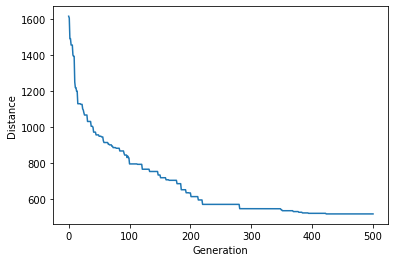

[(23,52),
 (68,98),
 (8,43),
 (14,30),
 (9,28),
 (16,7),
 (24,5),
 (31,2),
 (37,2),
 (53,11),
 (72,5),
 (96,11),
 (98,4),
 (94,5),
 (86,14),
 (84,18),
 (81,23),
 (81,27),
 (68,29),
 (44,48),
 (55,60),
 (51,63),
 (24,51),
 (71,100),
 (73,88),
 (95,64),
 (100,58),
 (100,66),
 (56,94),
 (56,97),
 (21,100),
 (25,71),
 (16,69),
 (3,59),
 (8,57)]

In [71]:
GeneticAlgorithm(cityList,50,0.01,10,500)

In [66]:
inipop = initialPopulation(cityList,10)

In [67]:
inipop

[[(16,69),
  (98,4),
  (72,5),
  (8,43),
  (96,11),
  (100,66),
  (24,5),
  (100,58),
  (71,100),
  (21,100),
  (56,97),
  (3,59),
  (51,63),
  (55,60),
  (24,51),
  (8,57),
  (25,71),
  (73,88),
  (9,28),
  (37,2),
  (31,2),
  (44,48),
  (81,23),
  (68,98),
  (23,52),
  (16,7),
  (68,29),
  (95,64),
  (94,5),
  (86,14),
  (84,18),
  (56,94),
  (81,27),
  (53,11),
  (14,30)],
 [(21,100),
  (37,2),
  (51,63),
  (8,57),
  (55,60),
  (100,66),
  (8,43),
  (84,18),
  (68,98),
  (94,5),
  (56,94),
  (44,48),
  (98,4),
  (23,52),
  (86,14),
  (95,64),
  (25,71),
  (16,69),
  (9,28),
  (24,5),
  (81,23),
  (72,5),
  (24,51),
  (53,11),
  (31,2),
  (16,7),
  (100,58),
  (96,11),
  (73,88),
  (81,27),
  (56,97),
  (3,59),
  (14,30),
  (71,100),
  (68,29)],
 [(56,97),
  (16,69),
  (21,100),
  (96,11),
  (71,100),
  (9,28),
  (86,14),
  (95,64),
  (16,7),
  (68,29),
  (72,5),
  (24,5),
  (94,5),
  (44,48),
  (55,60),
  (24,51),
  (100,66),
  (81,27),
  (100,58),
  (37,2),
  (81,23),
  (8,57),
  (

In [68]:
ranks=rankRoutes(inipop)

In [69]:
ranks

[(0, 0.0005635010465802401),
 (9, 0.0005568793318863608),
 (5, 0.0005336105119573498),
 (6, 0.0005039005313534782),
 (2, 0.0004980578793999625),
 (4, 0.00047902832614269434),
 (8, 0.0004787330868167698),
 (7, 0.00047312412700532136),
 (1, 0.0004615674333698782),
 (3, 0.0004352208131095586)]

In [70]:
selected = selection(ranks)

TypeError: selection() missing 1 required positional argument: 'elitesize'

In [ ]:
selected

In [ ]:
matpool= matingpool(selected,inipop)

In [ ]:
matpool

In [ ]:
bredpop = breedpopulation(matpool)

In [ ]:
bredpop

In [ ]:
mutpop = mutatepopulation(bredpop,0.1)

In [ ]:
mutpop